In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
#setting up a theme
b= sns
sns.set_theme(style="whitegrid") 
colors=sns.color_palette("husl")



In [5]:
df = pd.read_csv('/content/drive/MyDrive/Data science/My projects/Time series/FremontBridge.csv',index_col='Date')

In [6]:
df.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
10/3/2012 0:00,9.0,4.0
10/3/2012 1:00,6.0,4.0
10/3/2012 2:00,1.0,1.0
10/3/2012 3:00,3.0,2.0
10/3/2012 4:00,1.0,6.0


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Data science/My projects/Time series/FremontBridge.csv',index_col='Date', parse_dates=['Date'])
df.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [8]:
df.shape

(50328, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50328 entries, 2012-10-03 00:00:00 to 2018-06-30 23:00:00
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Fremont Bridge East Sidewalk  50319 non-null  float64
 1   Fremont Bridge West Sidewalk  50319 non-null  float64
dtypes: float64(2)
memory usage: 1.2 MB


In [10]:
#Total Number of missing values
df.isnull().sum().sort_values(ascending=False)

Fremont Bridge West Sidewalk    9
Fremont Bridge East Sidewalk    9
dtype: int64

In [11]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head(29)



,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2013-06-14 09:00:00,NaN,NaN
2013-06-14 10:00:00,NaN,NaN
2014-03-09 02:00:00,NaN,NaN
2015-03-08 02:00:00,NaN,NaN
2015-04-21 11:00:00,NaN,NaN
2015-04-21 12:00:00,NaN,NaN
2016-03-13 02:00:00,NaN,NaN
2017-03-12 02:00:00,NaN,NaN
2018-03-11 02:00:00,NaN,NaN


In [12]:
#remove negative values with rows
df=df.dropna()

In [13]:
#Total Number of missing values
df.isnull().sum().sort_values(ascending=False)

Fremont Bridge West Sidewalk    0
Fremont Bridge East Sidewalk    0
dtype: int64

In [14]:
df["Total"] = df["Fremont Bridge West Sidewalk"] + df["Fremont Bridge East Sidewalk"] 
df.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


# Indexing in Time-Series Data

In [15]:
df.loc['11/1/2015 0:00':'11/1/2017 0:00']

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total
Date,,,
2015-11-01 00:00:00,5.0,3.0,8.0
2015-11-01 01:00:00,3.0,8.0,11.0
2015-11-01 02:00:00,0.0,1.0,1.0
2015-11-01 03:00:00,1.0,3.0,4.0
2015-11-01 04:00:00,3.0,0.0,3.0
...,...,...,...
2017-10-31 20:00:00,41.0,31.0,72.0
2017-10-31 21:00:00,19.0,13.0,32.0
2017-10-31 22:00:00,23.0,17.0,40.0


In [16]:
df.loc['11/1/2015 0:00':'11/1/2017 0:00':24]

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total
Date,,,
2015-11-01 00:00:00,5.0,3.0,8.0
2015-11-02 00:00:00,5.0,2.0,7.0
2015-11-03 00:00:00,1.0,9.0,10.0
2015-11-04 00:00:00,3.0,1.0,4.0
2015-11-05 00:00:00,4.0,4.0,8.0
...,...,...,...
2017-10-27 02:00:00,1.0,0.0,1.0
2017-10-28 02:00:00,7.0,0.0,7.0
2017-10-29 02:00:00,5.0,4.0,9.0


## Time-Resampling using Pandas

# Rolling Time Series

In [17]:
df.rolling(window=10).mean().head(20) # head to see first 20 values 


,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total
Date,,,
2012-10-03 00:00:00,NaN,NaN,NaN
2012-10-03 01:00:00,NaN,NaN,NaN
2012-10-03 02:00:00,NaN,NaN,NaN
2012-10-03 03:00:00,NaN,NaN,NaN
2012-10-03 04:00:00,NaN,NaN,NaN
2012-10-03 05:00:00,NaN,NaN,NaN
2012-10-03 06:00:00,NaN,NaN,NaN
2012-10-03 07:00:00,NaN,NaN,NaN
2012-10-03 08:00:00,NaN,NaN,NaN


In [18]:
df.rolling(window=30).max()[30:].head(20) # head is just to check top 20 values


,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total
Date,,,
2012-10-04 06:00:00,391.0,291.0,583.0
2012-10-04 07:00:00,391.0,291.0,583.0
2012-10-04 08:00:00,391.0,291.0,583.0
2012-10-04 09:00:00,391.0,291.0,583.0
2012-10-04 10:00:00,391.0,291.0,583.0
2012-10-04 11:00:00,391.0,291.0,583.0
2012-10-04 12:00:00,391.0,291.0,583.0
2012-10-04 13:00:00,391.0,291.0,583.0
2012-10-04 14:00:00,391.0,284.0,583.0


In [19]:
df.dropna().describe()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total
count,50319.000000,50319.000000,50319.000000
mean,56.934399,52.940678,109.875077
std,82.835585,68.728939,138.526584
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,28.000000,29.000000,60.000000
75%,69.000000,70.000000,143.000000
max,717.000000,698.000000,957.000000


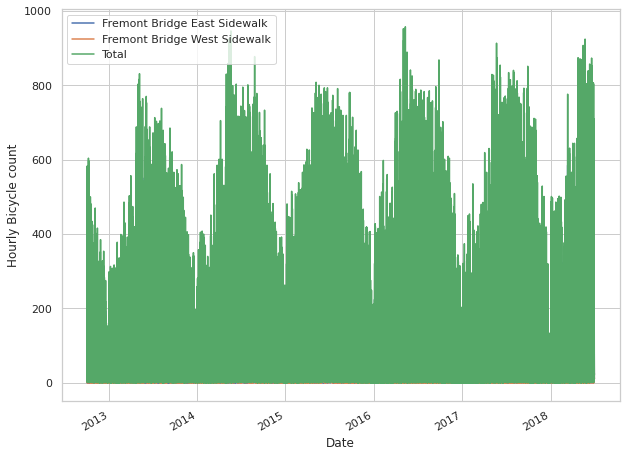

In [20]:
fig_dims = (10, 8)
df.plot(figsize=fig_dims)
plt.ylabel("Hourly Bicycle count")
plt.show()

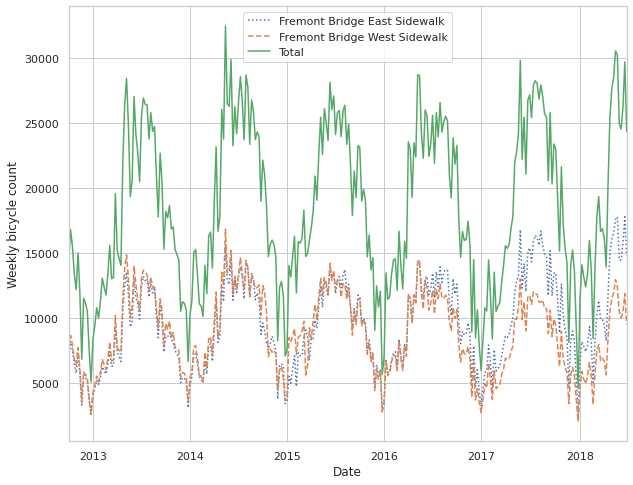

In [21]:
fig_dims = (10, 8)
weekly = df.resample("W").sum()
weekly.plot(style=[':', '--', '-'],figsize=fig_dims)
plt.ylabel('Weekly bicycle count')
plt.show()

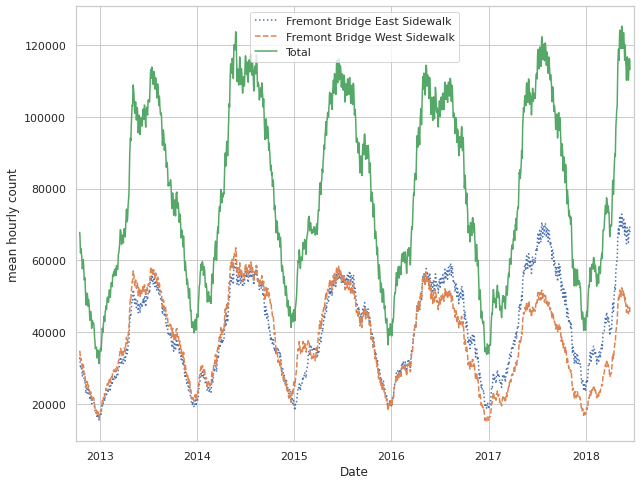

In [22]:
daily = df.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'],figsize=fig_dims)
plt.ylabel('mean hourly count')
plt.show()

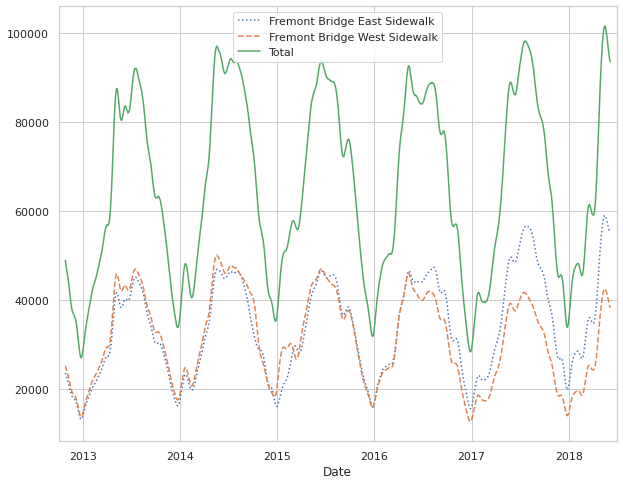

In [23]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':','--', '-'],figsize=fig_dims)
plt.show()

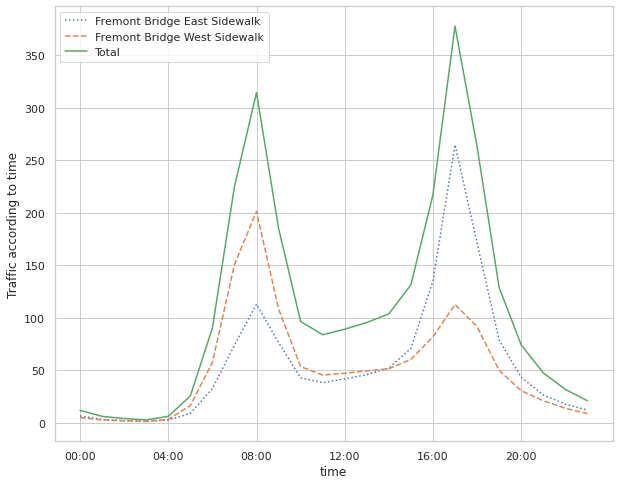

In [24]:
by_time = df.groupby(df.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks= hourly_ticks, style=[':', '--', '-'],figsize=fig_dims)
plt.ylabel("Traffic according to time")
plt.show()

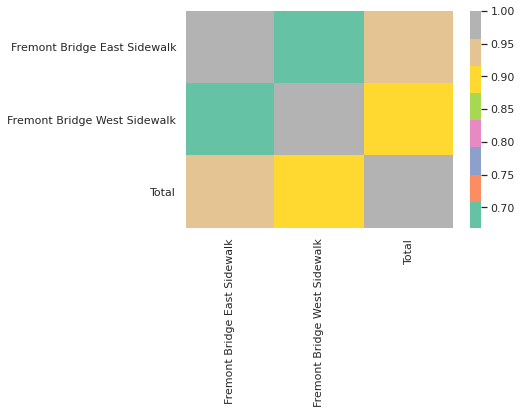

In [25]:
sns.heatmap(df.corr(),cmap="Set2")
#you can find futher color map for heatmap, cmap="YlGnBu" on seaborn website

In [26]:
x = df[['Fremont Bridge East Sidewalk','Fremont Bridge West Sidewalk']]
y = df[['Total']]

In [27]:
x

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0
...,...,...
2018-06-30 19:00:00,39.0,31.0
2018-06-30 20:00:00,30.0,13.0
2018-06-30 21:00:00,21.0,13.0


In [28]:
df.shape

(50319, 3)

In [29]:
y

,Total
Date,
2012-10-03 00:00:00,13.0
2012-10-03 01:00:00,10.0
2012-10-03 02:00:00,2.0
2012-10-03 03:00:00,5.0
2012-10-03 04:00:00,7.0
...,...
2018-06-30 19:00:00,70.0
2018-06-30 20:00:00,43.0
2018-06-30 21:00:00,34.0


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

In [31]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=42)

In [32]:
LR = LinearRegression()
DTR = DecisionTreeRegressor()
LGR = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
RF = RandomForestClassifier()
svc = SVC(kernel='linear')


In [33]:
LR.fit(X_train,y_train)
#LGR.fit(X_train,y_train.values.reshape(-1,))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
DTR.fit(X_train,y_train)
#RF.fit(X_train,y_train.values.reshape(-1,))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [38]:
#svc.fit(X_train,y_train.values.reshape(-1,))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
pred_ylg = LR.predict(X_test)
pred_ydtr = DTR.predict(X_test)
# pred_ylgr = LGR.predict(X_test)
# pred_yrf = RF.predict(X_test)
# pred_ysvc = svc.predict(X_test)

In [43]:
score_lg=round(LR.score(X_test,y_test)*100,2)

score_dtr=round(DTR.score(X_test,y_test)*100,2)
print('Decision Tree Regressor Accuracy :',score_dtr,'%')
print('Linear Regression Accuracy :',score_lg,'%')


Decision Tree Regressor Accuracy : 99.97 %
Linear Regression Accuracy : 100.0 %


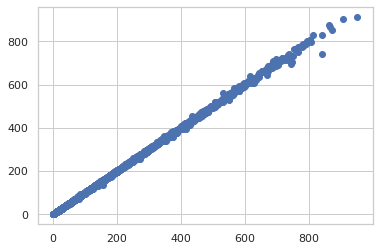

In [55]:
plt.scatter(y_test,pred_ydtr)

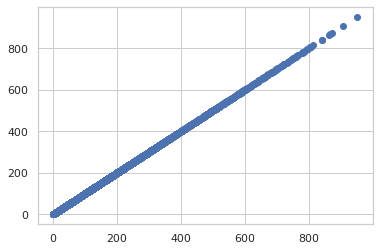

In [46]:
plt.scatter(y_test,pred_ylg)

In [53]:
new_input = [[9.0	,3.0]]
print(LR.predict(new_input))

[[12.]]


In [49]:
new_input = [[9.0	,0.0]]
print(DTR.predict(new_input))

[9.]


In [51]:
from sklearn import metrics

print('MAE:', round(metrics.mean_absolute_error(y_test, pred_ylg),2)) 
print('MSE:', round(metrics.mean_squared_error(y_test,pred_ylg),2))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, pred_ylg)),2)) 

MAE: 0.0
MSE: 0.0
RMSE: 0.0


In [52]:
from sklearn import metrics

print('MAE:', round(metrics.mean_absolute_error(y_test, pred_ydtr),2)) 
print('MSE:', round(metrics.mean_squared_error(y_test, pred_ydtr),2))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, pred_ydtr)),2)) 

MAE: 0.6
MSE: 5.62
RMSE: 2.37
